<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/KMeans_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all libraires
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Train data
X = df[["sepal_length", "sepal_width","petal_length","petal_width"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#Select k values
k = 3

In [19]:
#implementing k means
kMeans = KMeans(
    n_clusters=k,
    init="k-means++",
    max_iter=300,
    random_state=42
)
kMeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
labels = kMeans.labels_
df['cluster'] = labels
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1


<Figure size 1000x600 with 0 Axes>

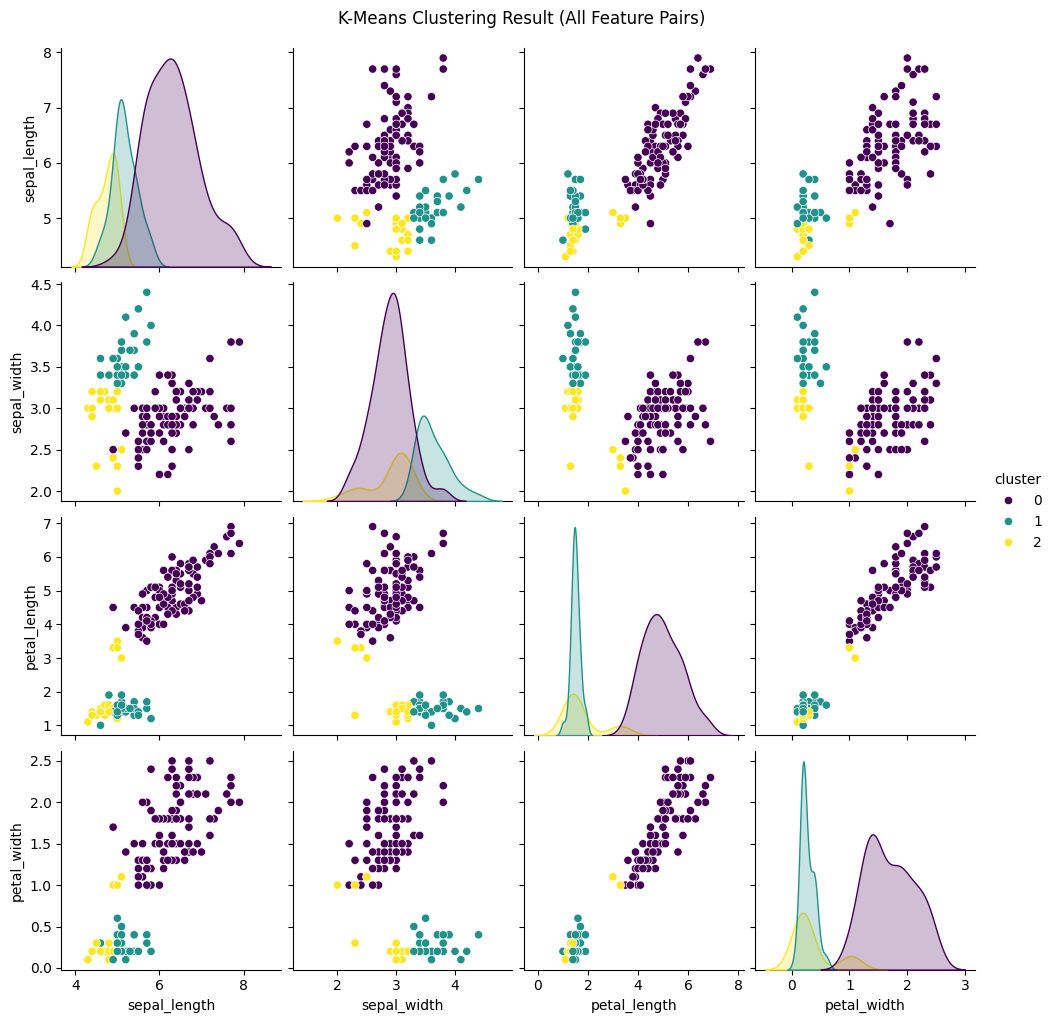

In [23]:
#Visualization of cluster
plt.figure(figsize=(10, 6))
sns.pairplot(
    df,
    vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    hue="cluster",
    palette="viridis"
)

plt.suptitle("K-Means Clustering Result (All Feature Pairs)", y=1.02)
plt.show()

In [24]:
#find optimal k
inertia_values = []
kRange = range(1, 11)

for k in kRange:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

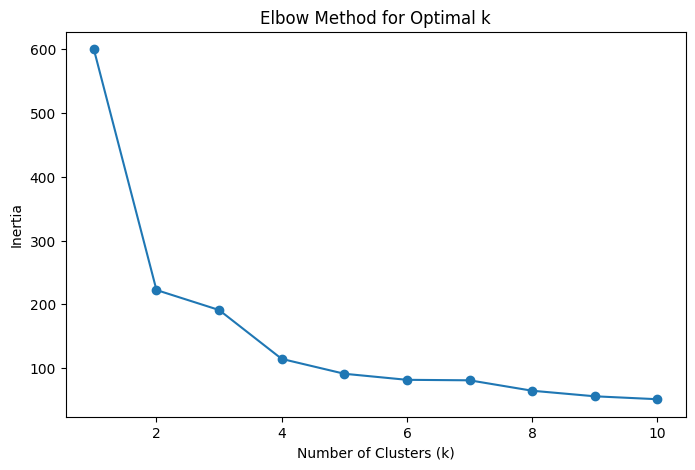

In [26]:
#plot inertia values vs k
plt.figure(figsize=(8, 5))
plt.plot(kRange, inertia_values, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [27]:
#model evaluation
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4798814508199818
